# Histograms, Summary Statistics, Violin Plots with Pretty Colors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts

In [2]:
filepath1 = "Vertical_Merge.csv"
df= pd.read_csv(filepath1)
df.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [3]:
df = df.drop(['Happiness Rank'], axis=1)
df.head()

,Country,Happiness Score,Economy (GDP per Capita),Social Support,Health Life Expectancy,Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# Histograms

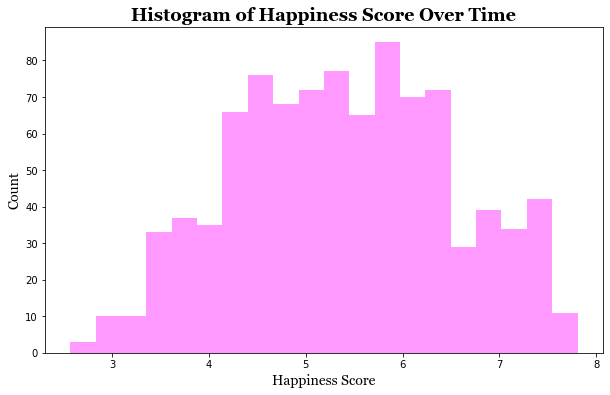

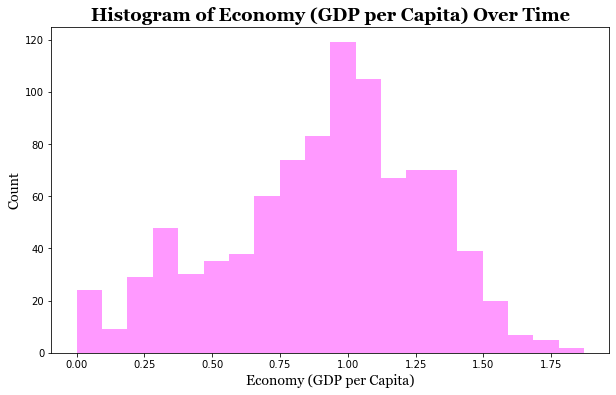

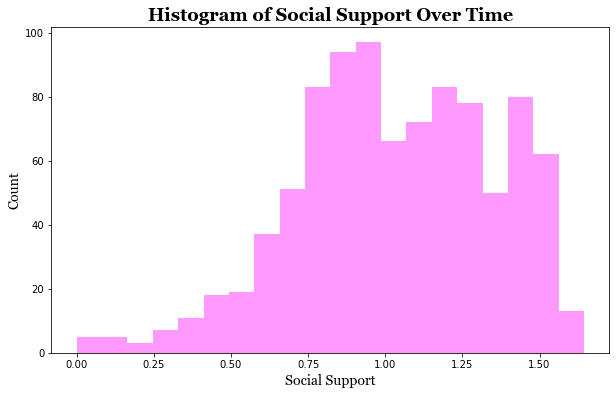

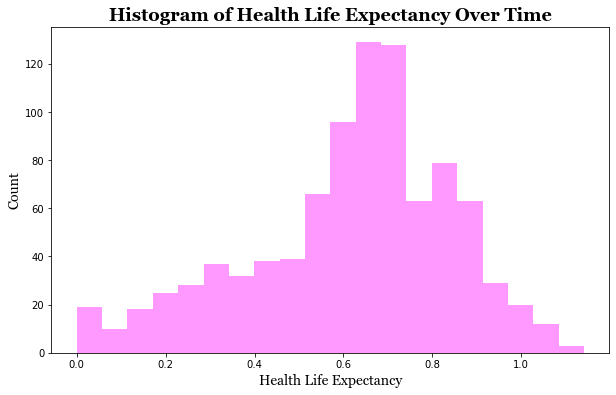

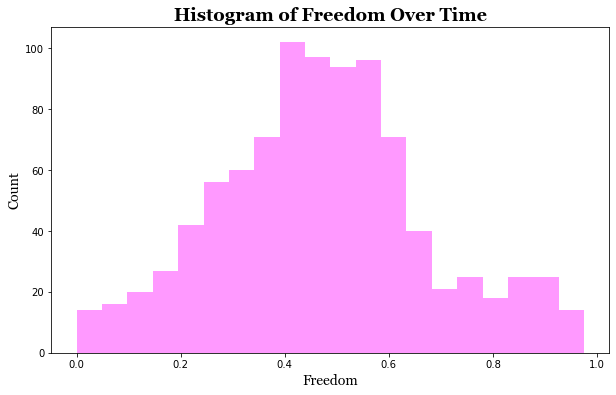

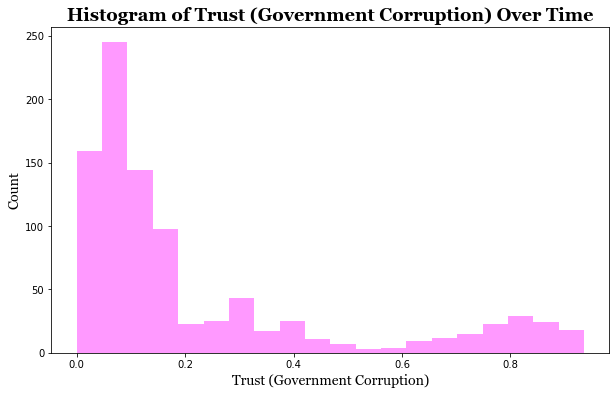

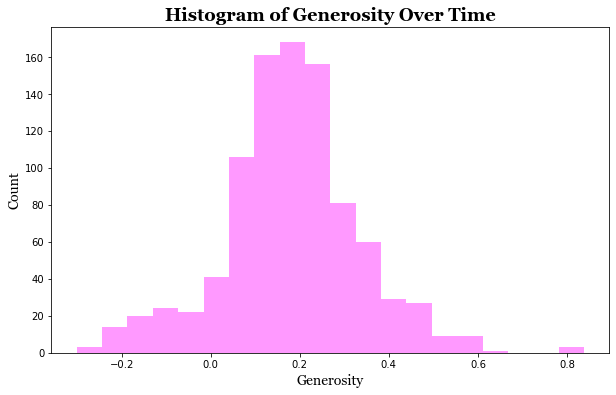

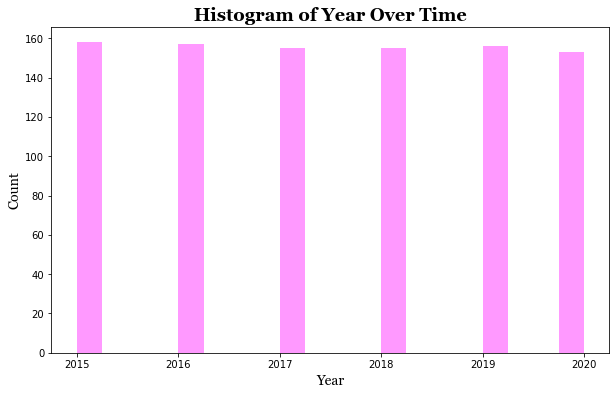

In [4]:
for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make hist
        plt.figure(figsize=(10,6))
        
        sns.distplot(df[col],kde = False, color = "fuchsia", bins=20)

        plt.title(f"Histogram of {col} Over Time", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel(col, fontsize=14, fontname = "Georgia")
        plt.ylabel("Count", fontsize=14, fontname = "Georgia")

        plt.show()
        

# Summary Statistics Over Time

In [5]:
def getSummaryStatistics(df, col):
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
    
        data = df[col]

        # Demonstrate calculating measures of central tendency
        mean_numpy = np.mean(data)
        print(f"The mean {col} is {mean_numpy}")

        median_numpy = np.median(data)
        print(f"The median {col} is {median_numpy}")

        mode_scipy = sts.mode(data)
        print(f"The mode {col} is {mode_scipy}")

        # Demonstrate calculating the variance and standard deviation using the different modules
        var_numpy = np.var(data,ddof = 0)
        print(f"The population variance using the NumPy module is {var_numpy}")

        sd_numpy = np.std(data,ddof = 0)
        print(f"The population standard deviation using the NumPy module is {sd_numpy}")

        print(f"The Results of the Normality Test are: {sts.normaltest(data)}")
    
for col in df.columns:
    print(col)
    getSummaryStatistics(df, col)
    print()

Country

Happiness Score
The mean Happiness Score is 5.392958992677684
The median Happiness Score is 5.3502499445
The mode Happiness Score is ModeResult(mode=array([2.905]), count=array([3]))
The population variance using the NumPy module is 1.2634382027866244
The population standard deviation using the NumPy module is 1.1240276699381668
The Results of the Normality Test are: NormaltestResult(statistic=51.876621800839196, pvalue=5.4341885875514596e-12)

Economy (GDP per Capita)
The mean Economy (GDP per Capita) is 0.9169993904193623
The median Economy (GDP per Capita) is 0.9666940399999999
The mode Economy (GDP per Capita) is ModeResult(mode=array([0.]), count=array([5]))
The population variance using the NumPy module is 0.1396334411202843
The population standard deviation using the NumPy module is 0.3736755827188663
The Results of the Normality Test are: NormaltestResult(statistic=30.22097302488143, pvalue=2.7390445042817773e-07)

Social Support
The mean Social Support is 1.0345409473

# Side by Side Bar Charts

In [6]:
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x="Year", y="Happiness Score", hue = "spread", data=df.groupby("Year")("Happiness Score")

# sns.distplot(df.groupby("Year")["Happiness Score"].max(), label="Max")
# sns.distplot(df.groupby("Year")["Happiness Score"].min(), label="Min")
 
# plt.show()

#import seaborn as sns
sns.set_theme(style="whitegrid")

#penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df.groupby("Year")("Happiness Score"), kind="bar",
    x="Year", y="Happiness Score", hue="???",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Year")
g.legend.set_title("")


AttributeError: module 'seaborn' has no attribute 'set_theme'

# Summary Statistics by Year

In [8]:
def getSummaryStatisticsGroupby(df, col):
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):

        data = df.groupby("Year")[col]

        avg_data = data.mean()
        print(f"Mean of {col} over time:")
        print(avg_data)
        print()
        max_data = data.max()
        print(f"The max of {col}  is: ")
        print(max_data)
        print()
        min_data = data.min()
        print(f"The min of {col} is:")
        print(min_data)
        print()
        median_data = data.median()
        print(f"The median of {col} is:")
        print(median_data)

for col in df.columns:
    print(col)
    getSummaryStatisticsGroupby(df, col)
    print()
    


Country

Happiness Score
Mean of Happiness Score over time:
Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.366897
2019    5.407096
2020    5.473240
Name: Happiness Score, dtype: float64

The max of Happiness Score  is: 
Year
2015    7.5870
2016    7.5260
2017    7.5370
2018    7.6320
2019    7.7690
2020    7.8087
Name: Happiness Score, dtype: float64

The min of Happiness Score is:
Year
2015    2.8390
2016    2.9050
2017    2.6930
2018    2.9050
2019    2.8530
2020    2.5669
Name: Happiness Score, dtype: float64

The median of Happiness Score is:
Year
2015    5.2325
2016    5.3140
2017    5.2790
2018    5.3580
2019    5.3795
2020    5.5150
Name: Happiness Score, dtype: float64

Economy (GDP per Capita)
Mean of Economy (GDP per Capita) over time:
Year
2015    0.846137
2016    0.953880
2017    0.984718
2018    0.883677
2019    0.905147
2020    0.929571
Name: Economy (GDP per Capita), dtype: float64

The max of Economy (GDP per Capita)  is: 
Year
2015    1.690420
2016  

In [ ]:
def getSummaryStatistics(df, col):
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
    
        data = df[col]

        # Demonstrate calculating measures of central tendency
        mean_numpy = np.mean(data)
        print(f"The mean {col} is {mean_numpy}")

        median_numpy = np.median(data)
        print(f"The median {col} is {median_numpy}")

        mode_scipy = sts.mode(data)
        print(f"The mode {col} is {mode_scipy}")

        # Demonstrate calculating the variance and standard deviation using the different modules
        var_numpy = np.var(data,ddof = 0)
        print(f"The population variance using the NumPy module is {var_numpy}")

        sd_numpy = np.std(data,ddof = 0)
        print(f"The population standard deviation using the NumPy module is {sd_numpy}")

        print(f"The Results of the Normality Test are: {sts.normaltest(data)}")
    
for col in df.columns:
    print(col)
    getSummaryStatistics(df, col)
    print()

# Violin Plots

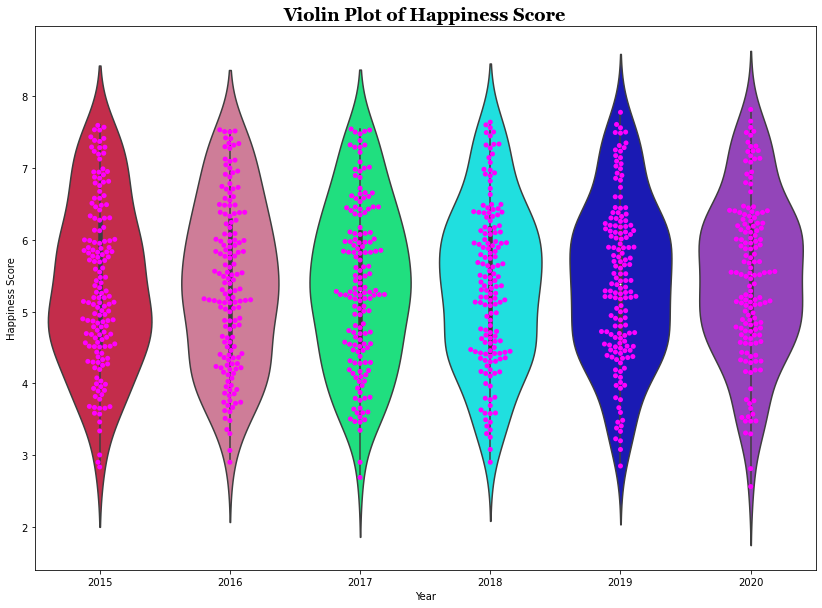

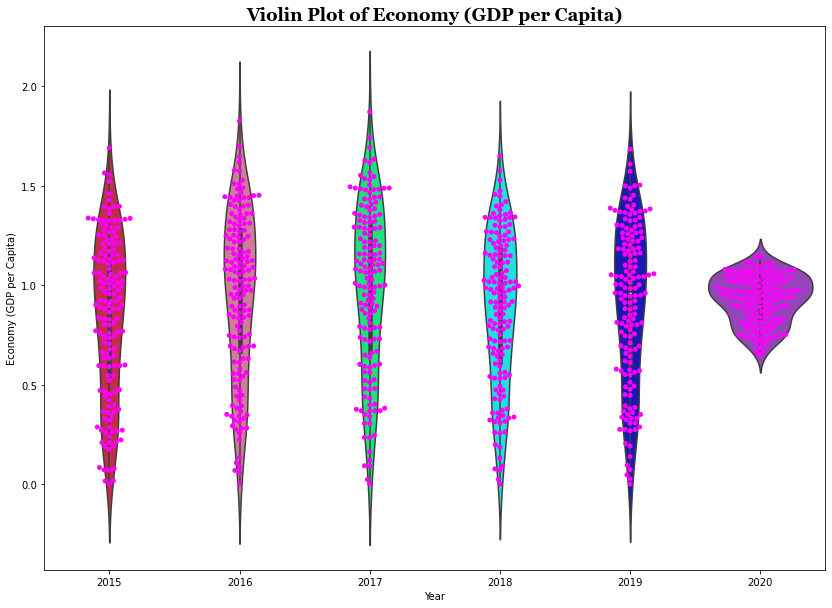

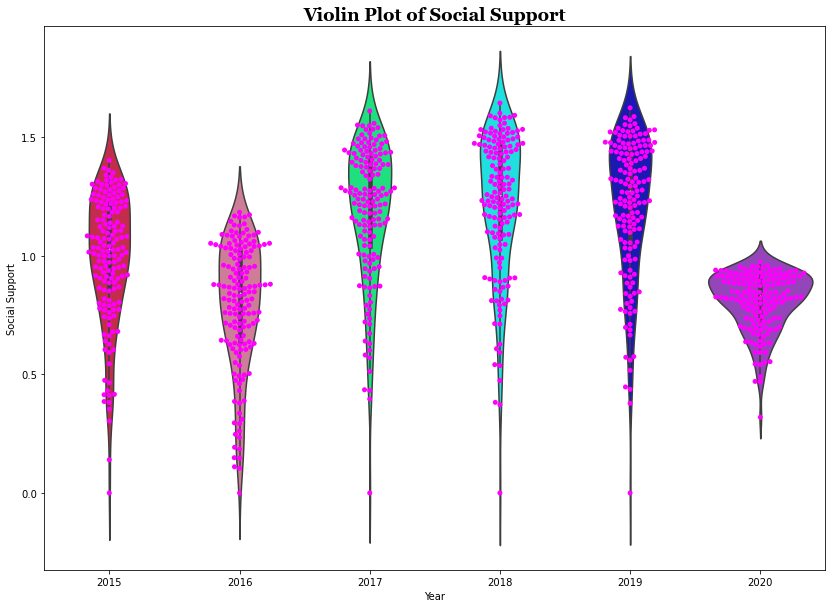

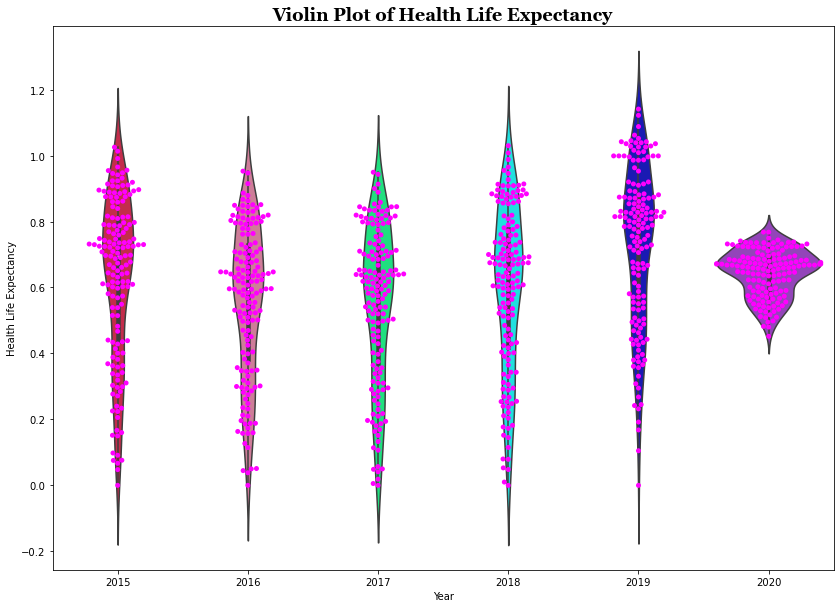

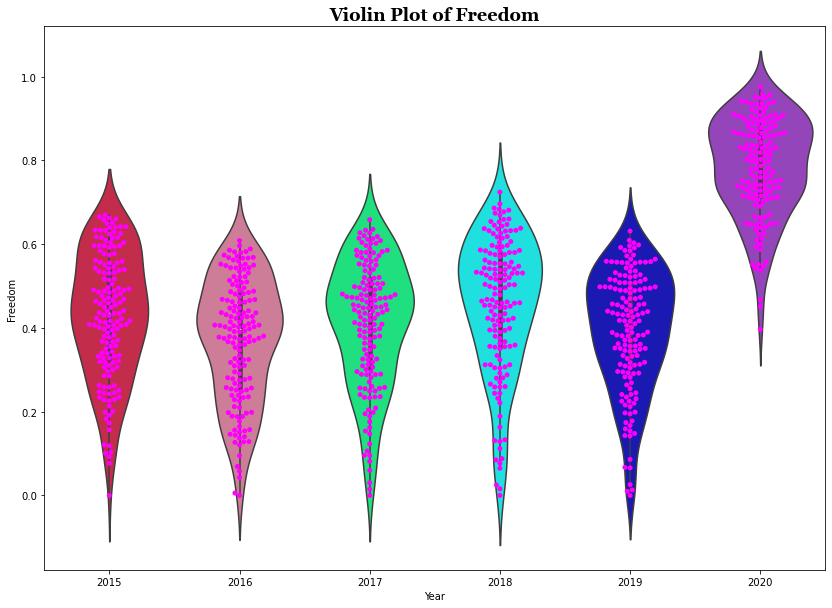

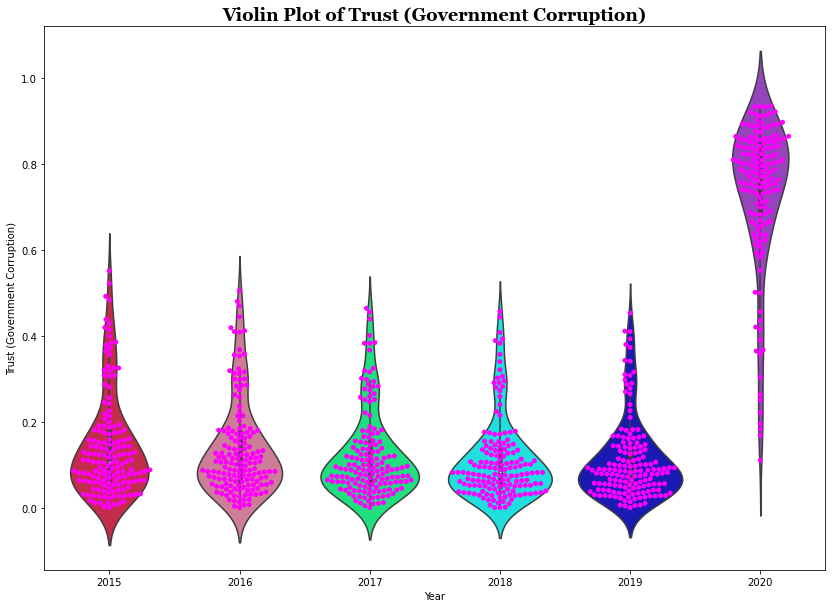

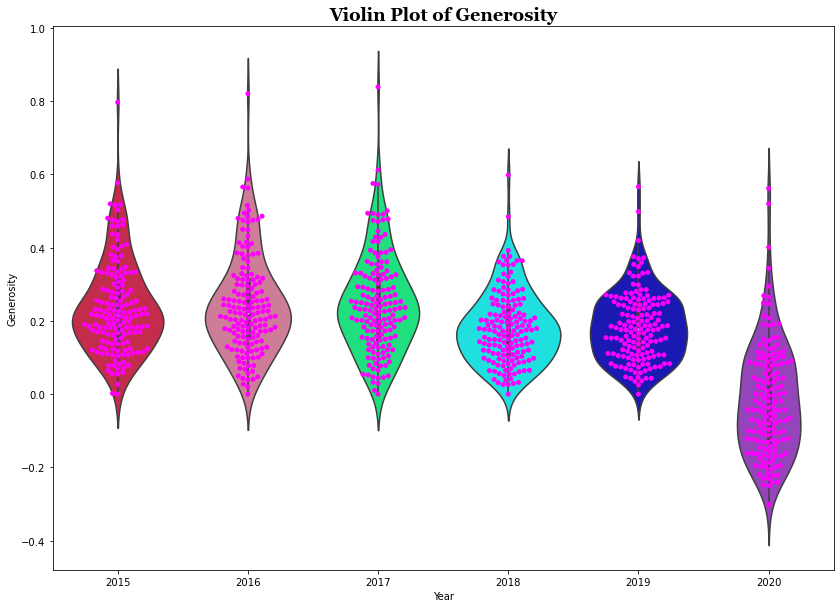

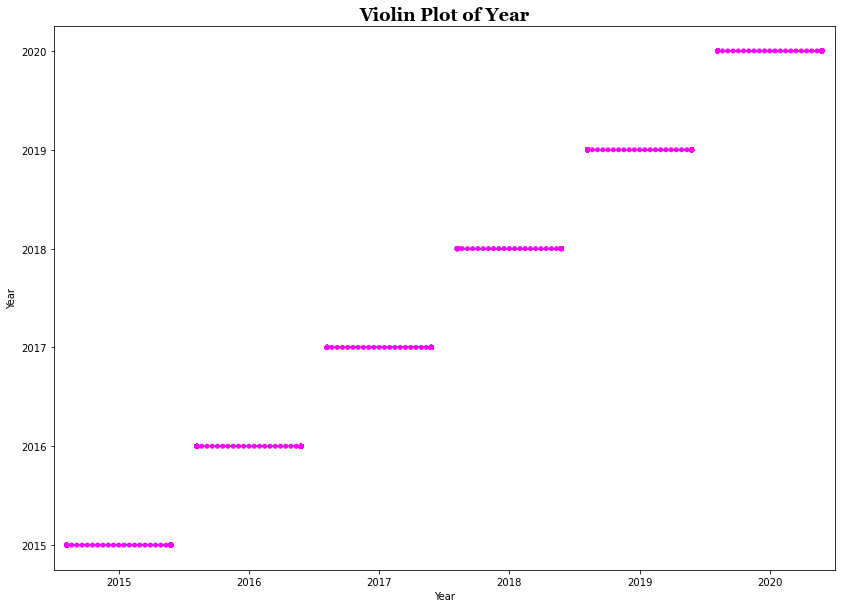

In [20]:
color = ["crimson", "palevioletred", "springgreen", "aqua", "mediumblue", "darkorchid" ]

for col in df.columns:
    if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
        #make violin plots
        plt.figure(figsize=(14,10))
        
        
        sns.violinplot(x="Year", y=col, data = df, showmeans="True", palette = color)
        sns.swarmplot(x= "Year", y=col, data=df, color = "fuchsia", edgecolor = "gray")
        plt.title(f"Violin Plot of {col}", fontsize=18, fontweight="bold", fontname = "Georgia")
        plt.xlabel('Year')
        plt.ylabel(col)

        plt.show()
        